# Evaluating a Machine Learning Model
This notebook contains the code for the eigth part of this data science project - model evaluation. Section headings have been included for convenience and the full writeup is available [on my website](https://www.pineconedata.com/2024-09-13-basketball-train-ols/).

## Project Overview
This is part of a series that walks through the entire process of a data science project - from initial steps like data acquisition, preprocessing, and cleaning to more advanced steps like feature engineering, creating visualizations, and machine learning. The dataset used in this project contains individual basketball player statistics (such as total points scored and blocks made) for the 2023-2024 NCAA women’s basketball season.

### Articles in this Series   
1. [Acquiring and Combining the Datasets](https://www.pineconedata.com/2024-04-11-basketball-data-acquisition/)
2. [Cleaning and Preprocessing the Data](https://www.pineconedata.com/2024-05-02-basketball-data-cleaning-preprocessing/)
3. [Engineering New Features](https://www.pineconedata.com/2024-05-30-basketball-feature_engineering/)
4. [Exploratory Data Analysis](https://www.pineconedata.com/2024-06-28-basketball-data-exploration/)
5. [Visualizations, Charts, and Graphs](https://www.pineconedata.com/2024-07-29-basketball-visualizations/)
6. [Selecting a Machine Learning Model](https://www.pineconedata.com/2024-08-12-basketball-select-ml-ols/)
7. [Training the Machine Learning Model](https://www.pineconedata.com/2024-09-13-basketball-train-ols/)
8. [Evaluating the Machine Learning Model](https://www.pineconedata.com/2024-11-27-basketball-evaluate-ols-model/) (This Notebook)

# Getting Started
Full requirements and environment setup information is detailed in the [first article of this series](https://www.pineconedata.com/2024-04-11-basketball-data-acquisition/).

## Import Packages

In [1]:
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

*Note: To reduce confusion, the variable names in this article are slightly different than in the previous notebook. Since the model initially trained used the full set of features, variable names for that model will be appended with `_full`. Since the alternate model trained used fewer features, variable names for that model will be appended with `_few` instead of `_alt`. For example, `X_test` is now `X_test_full` and `X_test_alt` is now `X_test_few`.* 

In [2]:
from pathlib import Path


data_folder = Path.cwd().parent / 'data'
model_folder = Path.cwd().parent / 'models'

In [3]:
X_test_full = pd.read_csv(data_folder / 'X_test_full.csv')
X_test_full.head()

,Height,MINUTES_PLAYED,FIELD_GOALS_MADE,THREE_POINTS_MADE,TWO_POINTS_MADE,FREE_THROWS_MADE,TOTAL_REBOUNDS,ASSISTS,TURNOVERS,STEALS,BLOCKS,FOULS,POINTS
0,71,821,184,43,141,80,155,36,90,51,5,46,491
1,71,840,61,7,54,45,221,40,41,34,9,63,174
2,68,961,100,36,64,75,120,107,84,27,1,79,311
3,73,1060,231,77,154,105,167,59,105,26,45,56,644
4,74,814,112,2,110,42,208,33,60,33,24,37,268


In [4]:
X_test_few = pd.read_csv(data_folder / 'X_test_few.csv')
X_test_few.head()

,Height,MINUTES_PLAYED,THREE_POINTS_MADE,FREE_THROWS_MADE,TOTAL_REBOUNDS,ASSISTS,TURNOVERS,STEALS,BLOCKS,FOULS
0,71,821,43,80,155,36,90,51,5,46
1,71,840,7,45,221,40,41,34,9,63
2,68,961,36,75,120,107,84,27,1,79
3,73,1060,77,105,167,59,105,26,45,56
4,74,814,2,42,208,33,60,33,24,37


In [5]:
y_actual = np.genfromtxt(data_folder / 'y_actual.csv', delimiter=',', skip_header=True)
y_actual

array([ 753. ,  544.2,  587.5,  969.9,  621.1,  594.4,  554.5,  808. ,
        884.2,  838.2,  901.6,  797.2, 1314.6,  474.1,  552.4,  687. ,
        514.9,  499. ,  886.9,  189.9,  697.1,  325.8,  465.8,  569.9,
        793.6,  691.4,  590.6,  661.2,  920. ,  643.1,  557.4,  634.1,
        562. ,  542.6,  848.8,  283. , 1218.9,  698.5,  476.1,  694. ,
        675.5,  638.8,  634.4,  646.9,  696.2,  611.3,  777.1,  335.3,
        430.7,  664.6,  604.9,  534.5,  860.9,  655.1,  478.8,  584. ,
        636.9,  787.2,  375.1,  622.7,  465.6,  545.4,  712.7,  398. ,
        538.5,  742.9,  559. ,  476.5,  395. ,  463.3,  568.3,  890.3,
        619. ,  582.4,  705.7,  690.6, 1027.6,  602.5,  540.3,  560.9,
        423.4,  653.3, 1171.8,  868.5,  526.8,  730. ,  834. ,  547.4,
        719.2,  765.3,  676.5,  826.8,  845. ,  361. ,  723.3,  372.7,
        876.9,  570.1,  708.8,  720.2,  780.5,  901.9,  489.8,  583.7,
        702. ,  769.6,  557.1,  595.5,  417.6,  799.9,  727.5,  960.4,
      

## Import Models


In [6]:
model_full = joblib.load(model_folder / 'model_full.sav')
model_few = joblib.load(model_folder / 'model_few.sav')

## Set Graph Preferences [Optional]

In [7]:
graph_colors = ['#615EEA', '#339E7A', '#ff8c6c']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=graph_colors)
sns.set_palette(graph_colors)

In [8]:
plt.style.use('seaborn-v0_8-white')

## Basics of Machine Learning

# Generate Predictions


## Calculate Predictions Manually

In [9]:
X_row = X_test_full.iloc[0][model_full.feature_names_in_]
X_row

Height                71
MINUTES_PLAYED       821
FIELD_GOALS_MADE     184
THREE_POINTS_MADE     43
TWO_POINTS_MADE      141
FREE_THROWS_MADE      80
TOTAL_REBOUNDS       155
ASSISTS               36
TURNOVERS             90
STEALS                51
BLOCKS                 5
FOULS                 46
POINTS               491
Name: 0, dtype: int64

In [10]:
row_pred = model_full.intercept_
for feature, coef in zip(X_row, model_full.coef_):
    row_pred += feature * coef
row_pred

753.0

## Calculate Predictions with .dot()

In [11]:
row_pred = model_full.intercept_ + np.dot(X_row, model_full.coef_)
row_pred

753.0

## Calculate Predictions with .predict()


In [12]:
row_pred = model_full.predict(X_test_full.iloc[[0]])
row_pred[0]

753.0

In [13]:
y_pred_full = model_full.predict(X_test_full)
y_pred_full[:5]

array([753. , 544.2, 587.5, 969.9, 621.1])

In [14]:
y_pred_few = model_few.predict(X_test_few)
y_pred_few[:5]

array([689.05242335, 629.09942281, 640.65898995, 934.3165614 ,
       617.45450647])

## Create Baseline Model

In [15]:
y_pred_base = np.full_like(y_actual, np.mean(y_actual))
y_pred_base[:5]

array([658.009375, 658.009375, 658.009375, 658.009375, 658.009375])

## Floating Point Errors

In [16]:
y_actual[0]

753.0

In [17]:
y_pred_full[0]

753.0000000000001

In [18]:
y_actual[0] == y_pred_full[0]

False

In [19]:
np.isclose(y_pred_full[0], y_actual[0])

True

In [20]:
np.allclose(y_pred_full, y_actual)

True

In [21]:
np.allclose(y_pred_few, y_actual)

False

# Evaluate the Model

## Evaluation Metrics


## Define Variables

### Calculate n

In [22]:
n = len(y_actual)
n

224

### Calculate the Mean

#### Equation

#### Calculate Manually

In [23]:
y_mean = np.sum(y_actual) / n
y_mean

658.009375

#### Calculate with NumPy

In [24]:
y_mean = np.mean(y_actual)
y_mean

658.009375

### Calculate Residuals

#### Equation

#### Calculate Manually

In [25]:
residuals_full = y_actual - y_pred_full
residuals_full[:5]

array([-1.13686838e-13,  0.00000000e+00, -1.13686838e-13, -2.27373675e-13,
       -2.27373675e-13])

In [26]:
residuals_few = y_actual - y_pred_few
residuals_few[:5]

array([ 63.94757665, -84.89942281, -53.15898995,  35.5834386 ,
         3.64549353])

In [27]:
residuals_base = y_actual - y_pred_base
residuals_base[:5]

array([  94.990625, -113.809375,  -70.509375,  311.890625,  -36.909375])

#### Evaluation


## $R^2$


### Equation

### Calculate Manually

In [28]:
tss = np.sum(np.square(residuals_base))

In [29]:
rss_full = np.sum(np.square(residuals_full))
rss_full

8.766983582068369e-24

In [30]:
rss_few = np.sum(np.square(residuals_few))
rss_few

580028.3960045542

In [31]:
rss_base = np.sum(np.square(residuals_base))
rss_base

7316716.2503125

In [32]:
r2_full = 1 - (rss_full / tss)
r2_full

1.0

In [33]:
r2_few = 1 - (rss_few / tss)
r2_few

0.920725585609558

In [34]:
r2_base = 1 - (rss_base / tss)
r2_base

0.0

### Calculate with scikit-learn

In [35]:
r2_full = r2_score(y_actual, y_pred_full)
r2_full

1.0

In [36]:
r2_few = r2_score(y_actual, y_pred_few)
r2_few

0.920725585609558

In [37]:
r2_base = r2_score(y_actual, y_pred_base)
r2_base

0.0

### Evaluation

## Adjusted \\(R^{2}\\)

### Equation

### Calculate Manually

In [38]:
p_full = model_full.n_features_in_
p_full

13

In [39]:
p_few = model_few.n_features_in_
p_few

10

In [40]:
p_base = 0
p_base

0

In [41]:
adj_r2_full = 1 - ((1 - r2_full) * (n - 1)) / (n - p_full - 1)
adj_r2_full

1.0

In [42]:
adj_r2_few = 1 - ((1 - r2_few) * (n - 1)) / (n - p_few - 1)
adj_r2_few

0.9170037821170489

In [43]:
adj_r2_base = 1 - ((1 - r2_base) * (n - 1)) / (n - p_base - 1)
adj_r2_base

0.0

### Calculate with scikit-learn

### Evaluation

## Mean Squared Error (MSE)

### Equation

### Calculate Manually

In [44]:
mse_full = np.sum(np.square(residuals_full)) / n
mse_full

3.9138319562805214e-26

In [45]:
mse_few = np.sum(np.square(residuals_few)) / n
mse_few

2589.4124821631885

In [46]:
mse_base = np.sum(np.square(residuals_base)) / n
mse_base

32663.91183175223

### Calculate Manually (Alternate Method)

In [47]:
mse_full = rss_full / n
mse_full

3.9138319562805214e-26

In [48]:
mse_few = rss_few / n
mse_few

2589.4124821631885

In [49]:
mse_base = rss_base / n
mse_base

32663.91183175223

### Calculate with scikit-learn

In [50]:
mse_full = mean_squared_error(y_actual, y_pred_full)
mse_full

3.9138319562805214e-26

In [51]:
mse_few = mean_squared_error(y_actual, y_pred_few)
mse_few

2589.4124821631885

In [52]:
mse_base = mean_squared_error(y_actual, y_pred_base)
mse_base

32663.91183175223

### Evaluation

## Root Mean Squared Error (RMSE) 

### Equation

### Calculate Manually

In [53]:
rmse_full = np.sqrt(mse_full)
rmse_full

1.9783407078358676e-13

In [54]:
rmse_few = np.sqrt(mse_few)
rmse_few

50.88627007517046

In [55]:
rmse_base = np.sqrt(mse_base)
rmse_base

180.7316016410861

### Calculate with scikit-learn 

In [56]:
rmse_full = root_mean_squared_error(y_actual, y_pred_full)
rmse_full

1.9783407078358676e-13

In [57]:
rmse_few = root_mean_squared_error(y_actual, y_pred_few)
rmse_few

50.88627007517046

In [58]:
rmse_base = root_mean_squared_error(y_actual, y_pred_base)
rmse_base

180.7316016410861

### Evaluation

In [59]:
print(f'y_actual values range from {np.amin(y_actual)} to {np.amax(y_actual)}')

y_actual values range from 189.9 to 1314.6


In [60]:
np.mean(y_actual)

658.009375

## Mean Absolute Error (MAE)

### Equation

### Calculate Manually

In [61]:
mae_full = np.sum(np.abs(residuals_full)) / n
mae_full

1.6634312974669488e-13

In [62]:
mae_few = np.sum(np.abs(residuals_few)) / n
mae_few

39.83435011538076

In [63]:
mae_base = np.sum(np.abs(residuals_base)) / n
mae_base

139.73130580357142

### Calculate with scikit-learn

In [64]:
mae_full = mean_absolute_error(y_actual, y_pred_full)
mae_full

1.6634312974669488e-13

In [65]:
mae_few = mean_absolute_error(y_actual, y_pred_few)
mae_few

39.83435011538076

In [66]:
mae_base = mean_absolute_error(y_actual, y_pred_base)
mae_base

139.73130580357142

### Evaluation

## Residuals Plots

### Evaluating Scatterplot of Residuals 

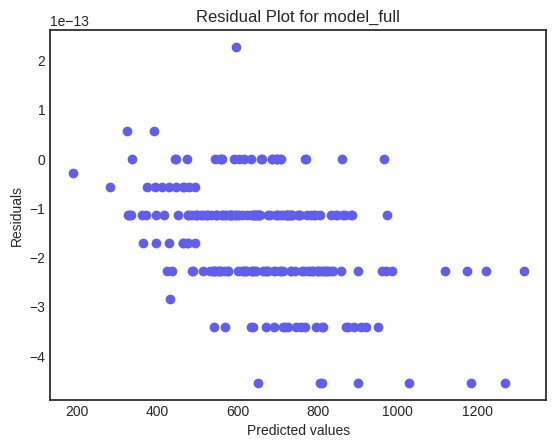

In [67]:
plt.scatter(y_pred_full, residuals_full)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot for model_full')
plt.show()

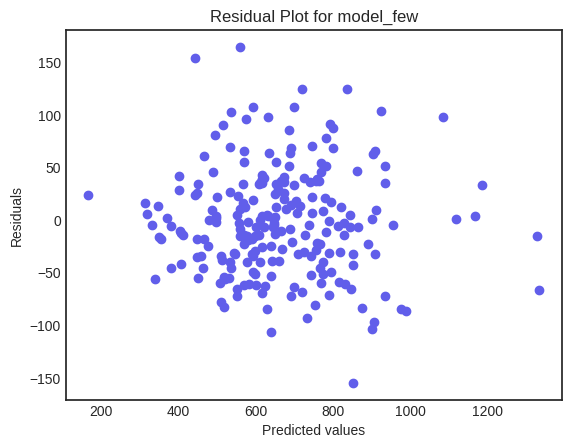

In [68]:
plt.scatter(y_pred_few, residuals_few)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot for model_few')
plt.show()

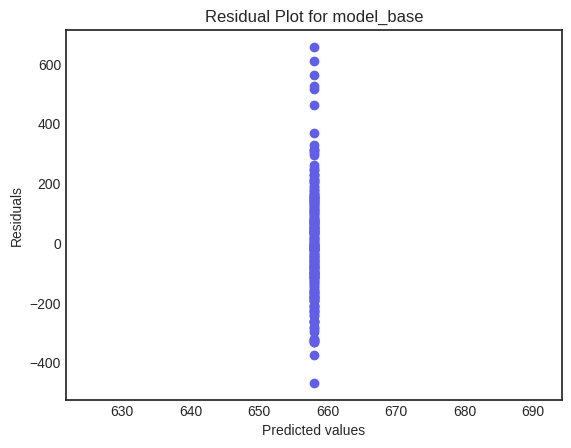

In [69]:
plt.scatter(y_pred_base, residuals_base)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot for model_base')
plt.show()

### Evaluating Histogram of Residuals

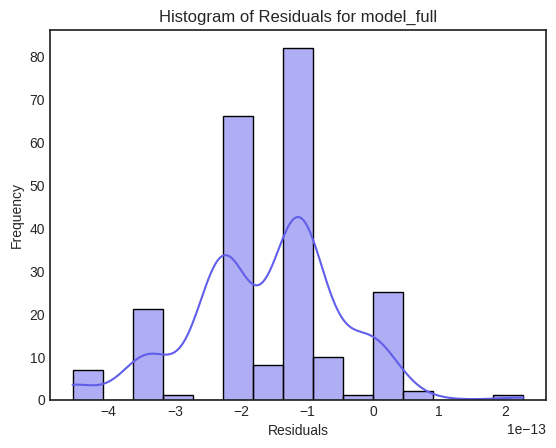

In [70]:
sns.histplot(residuals_full, bins=15, kde=True)
plt.title('Histogram of Residuals for model_full')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

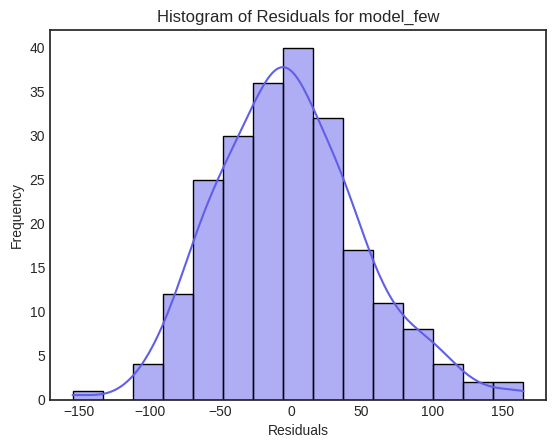

In [71]:
sns.histplot(residuals_few, bins=15, kde=True)
plt.title('Histogram of Residuals for model_few')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

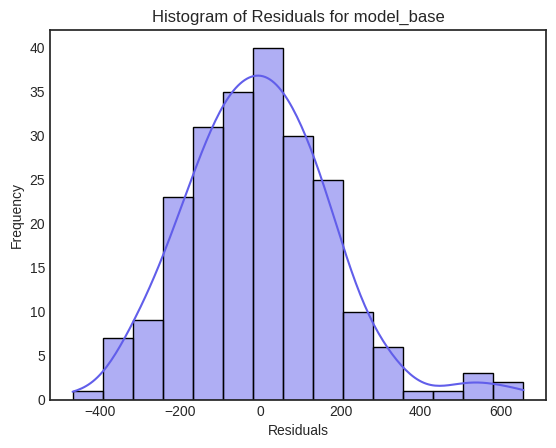

In [72]:
sns.histplot(residuals_base, bins=15, kde=True)
plt.title('Histogram of Residuals for model_base')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Feature Importance

In [73]:
coef_full = pd.Series(data=model_full.coef_, index=model_full.feature_names_in_)
coef_full

Height              -3.352062e-15
MINUTES_PLAYED      -2.775558e-17
FIELD_GOALS_MADE     1.666667e+00
THREE_POINTS_MADE    1.333333e+00
TWO_POINTS_MADE      3.333333e-01
FREE_THROWS_MADE     1.000000e+00
TOTAL_REBOUNDS       1.200000e+00
ASSISTS              1.500000e+00
TURNOVERS           -1.000000e+00
STEALS               2.000000e+00
BLOCKS               2.000000e+00
FOULS               -1.280226e-15
POINTS               1.319604e-14
dtype: float64

In [74]:
coef_full[abs(coef_full) < 1e-10] = 0
coef_full

Height               0.000000
MINUTES_PLAYED       0.000000
FIELD_GOALS_MADE     1.666667
THREE_POINTS_MADE    1.333333
TWO_POINTS_MADE      0.333333
FREE_THROWS_MADE     1.000000
TOTAL_REBOUNDS       1.200000
ASSISTS              1.500000
TURNOVERS           -1.000000
STEALS               2.000000
BLOCKS               2.000000
FOULS                0.000000
POINTS               0.000000
dtype: float64

In [75]:
coef_few = pd.Series(data=model_few.coef_, index=model_few.feature_names_in_)
coef_few

Height               2.453177
MINUTES_PLAYED       0.103874
THREE_POINTS_MADE    2.203725
FREE_THROWS_MADE     2.391730
TOTAL_REBOUNDS       1.521916
ASSISTS              1.323135
TURNOVERS           -0.570632
STEALS               2.239326
BLOCKS               2.481790
FOULS               -0.261209
dtype: float64

In [76]:
df = pd.DataFrame({'model_full': coef_full, 'model_few': coef_few}).fillna(0)
df['difference'] = df.model_few - df.model_full
df

,model_full,model_few,difference
ASSISTS,1.500000,1.323135,-0.176865
BLOCKS,2.000000,2.481790,0.481790
FIELD_GOALS_MADE,1.666667,0.000000,-1.666667
FOULS,0.000000,-0.261209,-0.261209
FREE_THROWS_MADE,1.000000,2.391730,1.391730
Height,0.000000,2.453177,2.453177
MINUTES_PLAYED,0.000000,0.103874,0.103874
POINTS,0.000000,0.000000,0.000000
STEALS,2.000000,2.239326,0.239326
THREE_POINTS_MADE,1.333333,2.203725,0.870391


# Export Data

In [77]:
np.savetxt(data_folder / 'y_pred_full.csv', y_pred_full, delimiter=',', fmt='%f', header='y_pred_full')
np.savetxt(data_folder / 'y_pred_few.csv', y_pred_few, delimiter=',', fmt='%f', header='y_pred_few')
np.savetxt(data_folder / 'y_pred_base.csv', y_pred_base, delimiter=',', fmt='%f', header='y_pred_base')